Following along in the Quick Start Guide

https://www.backtrader.com/docu/quickstart/quickstart/

In [1]:
from datetime import datetime 
import os
import backtrader as bt
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [9, 7]
plt.rcParams['figure.dpi'] = 100

In [2]:
data = bt.feeds.YahooFinanceCSVData(
    dataname=r'D:\home\projects\learn_backtrader\data\K.csv',
    # Do not pass values before this date
    fromdate=datetime(2000, 1, 1),
    # Do not pass values before this date
    todate=datetime(2000, 12, 31),
    # Do not pass values after this date
    reverse=False)

In [3]:
# Create a Stratey
class TestStrategy(bt.Strategy):

    def log(self, txt, dt=None):
        ''' Logging function for this strategy'''
        dt = dt or self.datas[0].datetime.date(0)
        print('%s, %s' % (dt.isoformat(), txt))

    def __init__(self):
        # Keep a reference to the "close" line in the data[0] dataseries
        self.dataclose = self.datas[0].close

    def next(self):
        # Simply log the closing price of the series from the reference
        self.log('Close, %.2f' % self.dataclose[0])

In [4]:
# Create a cerebro entity
cerebro = bt.Cerebro()
# Add a strategy
cerebro.addstrategy(TestStrategy)
# Add the Data Feed to Cerebro
cerebro.adddata(data)
# Set our desired cash start
cerebro.broker.setcash(100000.0)

print('Starting Portfolio Value: %.2f' % cerebro.broker.getvalue())
cerebro.run()
print('Final Portfolio Value: %.2f' % cerebro.broker.getvalue())

Starting Portfolio Value: 100000.00
2000-01-03, Close, 15.98
2000-01-04, Close, 15.41
2000-01-05, Close, 15.27
2000-01-06, Close, 15.41
2000-01-07, Close, 15.64
2000-01-10, Close, 15.14
2000-01-11, Close, 15.48
2000-01-12, Close, 15.07
2000-01-13, Close, 14.67
2000-01-14, Close, 14.21
2000-01-18, Close, 14.77
2000-01-19, Close, 14.34
2000-01-20, Close, 13.80
2000-01-21, Close, 13.37
2000-01-24, Close, 12.90
2000-01-25, Close, 12.80
2000-01-26, Close, 13.27
2000-01-27, Close, 13.10
2000-01-28, Close, 12.80
2000-01-31, Close, 12.97
2000-02-01, Close, 13.14
2000-02-02, Close, 12.80
2000-02-03, Close, 12.83
2000-02-04, Close, 12.50
2000-02-07, Close, 12.20
2000-02-08, Close, 12.53
2000-02-09, Close, 12.20
2000-02-10, Close, 11.70
2000-02-11, Close, 11.26
2000-02-14, Close, 11.36
2000-02-15, Close, 12.33
2000-02-16, Close, 12.10
2000-02-17, Close, 12.27
2000-02-18, Close, 11.87
2000-02-22, Close, 12.83
2000-02-23, Close, 12.63
2000-02-24, Close, 11.93
2000-02-25, Close, 11.36
2000-02-28, Cl

In [5]:
# Create a Stratey
class TestStrategyBuy(bt.Strategy):

    def log(self, txt, dt=None):
        ''' Logging function fot this strategy'''
        dt = dt or self.datas[0].datetime.date(0)
        print('%s, %s' % (dt.isoformat(), txt))

    def __init__(self):
        # Keep a reference to the "close" line in the data[0] dataseries
        self.dataclose = self.datas[0].close

    def next(self):
        # Simply log the closing price of the series from the reference
        self.log('Close, %.2f' % self.dataclose[0])

        if self.dataclose[0] < self.dataclose[-1]:
            # current close less than previous close

            if self.dataclose[-1] < self.dataclose[-2]:
                # previous close less than the previous close

                # BUY, BUY, BUY!!! (with all possible default parameters)
                self.log('BUY CREATE, %.2f' % self.dataclose[0])
                self.buy()

In [6]:
# Create a cerebro entity
cerebro = bt.Cerebro()
# Add a strategy
cerebro.addstrategy(TestStrategyBuy)
# Add the Data Feed to Cerebro
cerebro.adddata(data)
# Set our desired cash start
cerebro.broker.setcash(100000.0)

print('Starting Portfolio Value: %.2f' % cerebro.broker.getvalue())
cerebro.run()
print('Final Portfolio Value: %.2f' % cerebro.broker.getvalue())

Starting Portfolio Value: 100000.00
2000-01-03, Close, 15.98
2000-01-04, Close, 15.41
2000-01-05, Close, 15.27
2000-01-05, BUY CREATE, 15.27
2000-01-06, Close, 15.41
2000-01-07, Close, 15.64
2000-01-10, Close, 15.14
2000-01-11, Close, 15.48
2000-01-12, Close, 15.07
2000-01-13, Close, 14.67
2000-01-13, BUY CREATE, 14.67
2000-01-14, Close, 14.21
2000-01-14, BUY CREATE, 14.21
2000-01-18, Close, 14.77
2000-01-19, Close, 14.34
2000-01-20, Close, 13.80
2000-01-20, BUY CREATE, 13.80
2000-01-21, Close, 13.37
2000-01-21, BUY CREATE, 13.37
2000-01-24, Close, 12.90
2000-01-24, BUY CREATE, 12.90
2000-01-25, Close, 12.80
2000-01-25, BUY CREATE, 12.80
2000-01-26, Close, 13.27
2000-01-27, Close, 13.10
2000-01-28, Close, 12.80
2000-01-28, BUY CREATE, 12.80
2000-01-31, Close, 12.97
2000-02-01, Close, 13.14
2000-02-02, Close, 12.80
2000-02-03, Close, 12.83
2000-02-04, Close, 12.50
2000-02-07, Close, 12.20
2000-02-07, BUY CREATE, 12.20
2000-02-08, Close, 12.53
2000-02-09, Close, 12.20
2000-02-10, Close, 

In [7]:
# Create a Stratey
class TestStrategyBuySell(bt.Strategy):

    def log(self, txt, dt=None):
        ''' Logging function fot this strategy'''
        dt = dt or self.datas[0].datetime.date(0)
        print('%s, %s' % (dt.isoformat(), txt))

    def __init__(self):
        # Keep a reference to the "close" line in the data[0] dataseries
        self.dataclose = self.datas[0].close

        # To keep track of pending orders
        self.order = None

    def notify_order(self, order):
        if order.status in [order.Submitted, order.Accepted]:
            # Buy/Sell order submitted/accepted to/by broker - Nothing to do
            return

        # Check if an order has been completed
        # Attention: broker could reject order if not enough cash
        if order.status in [order.Completed]:
            if order.isbuy():
                self.log('BUY EXECUTED, %.2f' % order.executed.price)
            elif order.issell():
                self.log('SELL EXECUTED, %.2f' % order.executed.price)

            self.bar_executed = len(self)

        elif order.status in [order.Canceled, order.Margin, order.Rejected]:
            self.log('Order Canceled/Margin/Rejected')

        # Write down: no pending order
        self.order = None

    def next(self):
        # Simply log the closing price of the series from the reference
        self.log('Close, %.2f' % self.dataclose[0])

        # Check if an order is pending ... if yes, we cannot send a 2nd one
        if self.order:
            return

        # Check if we are in the market
        if not self.position:

            # Not yet ... we MIGHT BUY if ...
            if self.dataclose[0] < self.dataclose[-1]:
                    # current close less than previous close

                    if self.dataclose[-1] < self.dataclose[-2]:
                        # previous close less than the previous close

                        # BUY, BUY, BUY!!! (with default parameters)
                        self.log('BUY CREATE, %.2f' % self.dataclose[0])

                        # Keep track of the created order to avoid a 2nd order
                        self.order = self.buy()

        else:

            # Already in the market ... we might sell
            if len(self) >= (self.bar_executed + 5):
                # SELL, SELL, SELL!!! (with all possible default parameters)
                self.log('SELL CREATE, %.2f' % self.dataclose[0])

                # Keep track of the created order to avoid a 2nd order
                self.order = self.sell()

In [8]:
# Create a cerebro entity
cerebro = bt.Cerebro()
# Add a strategy
cerebro.addstrategy(TestStrategyBuySell)
# Add the Data Feed to Cerebro
cerebro.adddata(data)
# Set our desired cash start
cerebro.broker.setcash(100000.0)

print('Starting Portfolio Value: %.2f' % cerebro.broker.getvalue())
cerebro.run()
print('Final Portfolio Value: %.2f' % cerebro.broker.getvalue())

Starting Portfolio Value: 100000.00
2000-01-03, Close, 15.98
2000-01-04, Close, 15.41
2000-01-05, Close, 15.27
2000-01-05, BUY CREATE, 15.27
2000-01-06, BUY EXECUTED, 28.00
2000-01-06, Close, 15.41
2000-01-07, Close, 15.64
2000-01-10, Close, 15.14
2000-01-11, Close, 15.48
2000-01-12, Close, 15.07
2000-01-13, Close, 14.67
2000-01-13, SELL CREATE, 14.67
2000-01-14, SELL EXECUTED, 27.19
2000-01-14, Close, 14.21
2000-01-14, BUY CREATE, 14.21
2000-01-18, BUY EXECUTED, 26.31
2000-01-18, Close, 14.77
2000-01-19, Close, 14.34
2000-01-20, Close, 13.80
2000-01-21, Close, 13.37
2000-01-24, Close, 12.90
2000-01-25, Close, 12.80
2000-01-25, SELL CREATE, 12.80
2000-01-26, SELL EXECUTED, 23.50
2000-01-26, Close, 13.27
2000-01-27, Close, 13.10
2000-01-28, Close, 12.80
2000-01-28, BUY CREATE, 12.80
2000-01-31, BUY EXECUTED, 24.25
2000-01-31, Close, 12.97
2000-02-01, Close, 13.14
2000-02-02, Close, 12.80
2000-02-03, Close, 12.83
2000-02-04, Close, 12.50
2000-02-07, Close, 12.20
2000-02-07, SELL CREATE, 

In [9]:
# Create a Stratey
class TestStrategyBuySell2(bt.Strategy):

    def log(self, txt, dt=None):
        ''' Logging function fot this strategy'''
        dt = dt or self.datas[0].datetime.date(0)
        print('%s, %s' % (dt.isoformat(), txt))

    def __init__(self):
        # Keep a reference to the "close" line in the data[0] dataseries
        self.dataclose = self.datas[0].close

        # To keep track of pending orders and buy price/commission
        self.order = None
        self.buyprice = None
        self.buycomm = None

    def notify_order(self, order):
        if order.status in [order.Submitted, order.Accepted]:
            # Buy/Sell order submitted/accepted to/by broker - Nothing to do
            return

        # Check if an order has been completed
        # Attention: broker could reject order if not enough cash
        if order.status in [order.Completed]:
            if order.isbuy():
                self.log(
                    'BUY EXECUTED, Price: %.2f, Cost: %.2f, Comm %.2f' %
                    (order.executed.price,
                     order.executed.value,
                     order.executed.comm))

                self.buyprice = order.executed.price
                self.buycomm = order.executed.comm
            else:  # Sell
                self.log('SELL EXECUTED, Price: %.2f, Cost: %.2f, Comm %.2f' %
                         (order.executed.price,
                          order.executed.value,
                          order.executed.comm))

            self.bar_executed = len(self)

        elif order.status in [order.Canceled, order.Margin, order.Rejected]:
            self.log('Order Canceled/Margin/Rejected')

        self.order = None

    def notify_trade(self, trade):
        if not trade.isclosed:
            return

        self.log('OPERATION PROFIT, GROSS %.2f, NET %.2f' %
                 (trade.pnl, trade.pnlcomm))

    def next(self):
        # Simply log the closing price of the series from the reference
        self.log('Close, %.2f' % self.dataclose[0])

        # Check if an order is pending ... if yes, we cannot send a 2nd one
        if self.order:
            return

        # Check if we are in the market
        if not self.position:

            # Not yet ... we MIGHT BUY if ...
            if self.dataclose[0] < self.dataclose[-1]:
                    # current close less than previous close

                    if self.dataclose[-1] < self.dataclose[-2]:
                        # previous close less than the previous close

                        # BUY, BUY, BUY!!! (with default parameters)
                        self.log('BUY CREATE, %.2f' % self.dataclose[0])

                        # Keep track of the created order to avoid a 2nd order
                        self.order = self.buy()

        else:

            # Already in the market ... we might sell
            if len(self) >= (self.bar_executed + 5):
                # SELL, SELL, SELL!!! (with all possible default parameters)
                self.log('SELL CREATE, %.2f' % self.dataclose[0])

                # Keep track of the created order to avoid a 2nd order
                self.order = self.sell()

In [10]:
# Create a cerebro entity
cerebro = bt.Cerebro()
# Add a strategy
cerebro.addstrategy(TestStrategyBuySell2)
# Add the Data Feed to Cerebro
cerebro.adddata(data)
# Set our desired cash start
cerebro.broker.setcash(100000.0)
# Set the commission - 0.1%
cerebro.broker.setcommission(commission=0.001)
# Set the size of any trades
cerebro.addsizer(bt.sizers.SizerFix, stake=2000)

print('Starting Portfolio Value: %.2f' % cerebro.broker.getvalue())
cerebro.run()
print('Final Portfolio Value: %.2f' % cerebro.broker.getvalue())

Starting Portfolio Value: 100000.00
2000-01-03, Close, 15.98
2000-01-04, Close, 15.41
2000-01-05, Close, 15.27
2000-01-05, BUY CREATE, 15.27
2000-01-06, BUY EXECUTED, Price: 28.00, Cost: 56000.00, Comm 56.00
2000-01-06, Close, 15.41
2000-01-07, Close, 15.64
2000-01-10, Close, 15.14
2000-01-11, Close, 15.48
2000-01-12, Close, 15.07
2000-01-13, Close, 14.67
2000-01-13, SELL CREATE, 14.67
2000-01-14, SELL EXECUTED, Price: 27.19, Cost: 56000.00, Comm 54.38
2000-01-14, OPERATION PROFIT, GROSS -1620.00, NET -1730.38
2000-01-14, Close, 14.21
2000-01-14, BUY CREATE, 14.21
2000-01-18, BUY EXECUTED, Price: 26.31, Cost: 52620.00, Comm 52.62
2000-01-18, Close, 14.77
2000-01-19, Close, 14.34
2000-01-20, Close, 13.80
2000-01-21, Close, 13.37
2000-01-24, Close, 12.90
2000-01-25, Close, 12.80
2000-01-25, SELL CREATE, 12.80
2000-01-26, SELL EXECUTED, Price: 23.50, Cost: 52620.00, Comm 47.00
2000-01-26, OPERATION PROFIT, GROSS -5620.00, NET -5719.62
2000-01-26, Close, 13.27
2000-01-27, Close, 13.10
2000

In [11]:
class TestStrategySMA(bt.Strategy):
    params = (
        ('maperiod', 11),
    )

    def log(self, txt, dt=None):
        ''' Logging function fot this strategy'''
        dt = dt or self.datas[0].datetime.date(0)
        print('%s, %s' % (dt.isoformat(), txt))

    def __init__(self):
        # Keep a reference to the "close" line in the data[0] dataseries
        self.dataclose = self.datas[0].close

        # To keep track of pending orders and buy price/commission
        self.order = None
        self.buyprice = None
        self.buycomm = None

        # Add a MovingAverageSimple indicator
        self.sma = bt.indicators.SimpleMovingAverage(
            self.datas[0], period=self.params.maperiod)

    def notify_order(self, order):
        if order.status in [order.Submitted, order.Accepted]:
            # Buy/Sell order submitted/accepted to/by broker - Nothing to do
            return

        # Check if an order has been completed
        # Attention: broker could reject order if not enough cash
        if order.status in [order.Completed]:
            if order.isbuy():
                self.log(
                    'BUY EXECUTED, Price: %.2f, Cost: %.2f, Comm %.2f' %
                    (order.executed.price,
                     order.executed.value,
                     order.executed.comm))

                self.buyprice = order.executed.price
                self.buycomm = order.executed.comm
            else:  # Sell
                self.log('SELL EXECUTED, Price: %.2f, Cost: %.2f, Comm %.2f' %
                         (order.executed.price,
                          order.executed.value,
                          order.executed.comm))

            self.bar_executed = len(self)

        elif order.status in [order.Canceled, order.Margin, order.Rejected]:
            self.log('Order Canceled/Margin/Rejected')

        self.order = None

    def notify_trade(self, trade):
        if not trade.isclosed:
            return

        self.log('OPERATION PROFIT, GROSS %.2f, NET %.2f' %
                 (trade.pnl, trade.pnlcomm))

    def next(self):
        # Simply log the closing price of the series from the reference
        self.log('Close, %.2f' % self.dataclose[0])

        # Check if an order is pending ... if yes, we cannot send a 2nd one
        if self.order:
            return

        # Check if we are in the market
        if not self.position:

            # Not yet ... we MIGHT BUY if ...
            if self.dataclose[0] > self.sma[0]:

                # BUY, BUY, BUY!!! (with all possible default parameters)
                self.log('BUY CREATE, %.2f' % self.dataclose[0])

                # Keep track of the created order to avoid a 2nd order
                self.order = self.buy()

        else:

            if self.dataclose[0] < self.sma[0]:
                # SELL, SELL, SELL!!! (with all possible default parameters)
                self.log('SELL CREATE, %.2f' % self.dataclose[0])

                # Keep track of the created order to avoid a 2nd order
                self.order = self.sell()


In [12]:
# Create a cerebro entity
cerebro = bt.Cerebro()
# Add a strategy
cerebro.addstrategy(TestStrategySMA)
# Add the Data Feed to Cerebro
cerebro.adddata(data)
# Set our desired cash start
cerebro.broker.setcash(100000.0)
# # Set the commission - 0.1%
# cerebro.broker.setcommission(commission=0.001)
# # Set the size of any trades
# cerebro.addsizer(bt.sizers.SizerFix, stake=2000)

print('Starting Portfolio Value: %.2f' % cerebro.broker.getvalue())
cerebro.run()
print('Final Portfolio Value: %.2f' % cerebro.broker.getvalue())


Starting Portfolio Value: 100000.00
2000-01-18, Close, 14.77
2000-01-19, Close, 14.34
2000-01-20, Close, 13.80
2000-01-21, Close, 13.37
2000-01-24, Close, 12.90
2000-01-25, Close, 12.80
2000-01-26, Close, 13.27
2000-01-27, Close, 13.10
2000-01-28, Close, 12.80
2000-01-31, Close, 12.97
2000-02-01, Close, 13.14
2000-02-02, Close, 12.80
2000-02-03, Close, 12.83
2000-02-04, Close, 12.50
2000-02-07, Close, 12.20
2000-02-08, Close, 12.53
2000-02-09, Close, 12.20
2000-02-10, Close, 11.70
2000-02-11, Close, 11.26
2000-02-14, Close, 11.36
2000-02-15, Close, 12.33
2000-02-15, BUY CREATE, 12.33
2000-02-16, BUY EXECUTED, Price: 23.06, Cost: 23.06, Comm 0.00
2000-02-16, Close, 12.10
2000-02-16, SELL CREATE, 12.10
2000-02-17, SELL EXECUTED, Price: 22.38, Cost: 23.06, Comm 0.00
2000-02-17, OPERATION PROFIT, GROSS -0.68, NET -0.68
2000-02-17, Close, 12.27
2000-02-17, BUY CREATE, 12.27
2000-02-18, BUY EXECUTED, Price: 22.75, Cost: 22.75, Comm 0.00
2000-02-18, Close, 11.87
2000-02-18, SELL CREATE, 11.87

In [13]:
#cerebro.plot()

In [14]:
class TestStrategyManyIndicators(bt.Strategy):
    params = (
        ('maperiod', 15),
    )

    def log(self, txt, dt=None):
        ''' Logging function fot this strategy'''
        dt = dt or self.datas[0].datetime.date(0)
        print('%s, %s' % (dt.isoformat(), txt))

    def __init__(self):
        # Keep a reference to the "close" line in the data[0] dataseries
        self.dataclose = self.datas[0].close

        # To keep track of pending orders and buy price/commission
        self.order = None
        self.buyprice = None
        self.buycomm = None

        # Add a MovingAverageSimple indicator
        self.sma = bt.indicators.SimpleMovingAverage(
            self.datas[0], period=self.params.maperiod)

        # Indicators for the plotting show
        bt.indicators.ExponentialMovingAverage(self.datas[0], period=25)
        bt.indicators.WeightedMovingAverage(self.datas[0], period=25,
                                            subplot=True)
        bt.indicators.StochasticSlow(self.datas[0])
        bt.indicators.MACDHisto(self.datas[0])
        rsi = bt.indicators.RSI(self.datas[0])
        bt.indicators.SmoothedMovingAverage(rsi, period=10)
        bt.indicators.ATR(self.datas[0], plot=False)

    def notify_order(self, order):
        if order.status in [order.Submitted, order.Accepted]:
            # Buy/Sell order submitted/accepted to/by broker - Nothing to do
            return

        # Check if an order has been completed
        # Attention: broker could reject order if not enough cash
        if order.status in [order.Completed]:
            if order.isbuy():
                self.log(
                    'BUY EXECUTED, Price: %.2f, Cost: %.2f, Comm %.2f' %
                    (order.executed.price,
                     order.executed.value,
                     order.executed.comm))

                self.buyprice = order.executed.price
                self.buycomm = order.executed.comm
            else:  # Sell
                self.log('SELL EXECUTED, Price: %.2f, Cost: %.2f, Comm %.2f' %
                         (order.executed.price,
                          order.executed.value,
                          order.executed.comm))

            self.bar_executed = len(self)

        elif order.status in [order.Canceled, order.Margin, order.Rejected]:
            self.log('Order Canceled/Margin/Rejected')

        # Write down: no pending order
        self.order = None

    def notify_trade(self, trade):
        if not trade.isclosed:
            return

        self.log('OPERATION PROFIT, GROSS %.2f, NET %.2f' %
                 (trade.pnl, trade.pnlcomm))

    def next(self):
        # Simply log the closing price of the series from the reference
        self.log('Close, %.2f' % self.dataclose[0])

        # Check if an order is pending ... if yes, we cannot send a 2nd one
        if self.order:
            return

        # Check if we are in the market
        if not self.position:

            # Not yet ... we MIGHT BUY if ...
            if self.dataclose[0] > self.sma[0]:

                # BUY, BUY, BUY!!! (with all possible default parameters)
                self.log('BUY CREATE, %.2f' % self.dataclose[0])

                # Keep track of the created order to avoid a 2nd order
                self.order = self.buy()

        else:

            if self.dataclose[0] < self.sma[0]:
                # SELL, SELL, SELL!!! (with all possible default parameters)
                self.log('SELL CREATE, %.2f' % self.dataclose[0])

                # Keep track of the created order to avoid a 2nd order
                self.order = self.sell()

In [15]:
# Create a cerebro entity
cerebro = bt.Cerebro()
# Add a strategy
cerebro.addstrategy(TestStrategyManyIndicators)
# Add the Data Feed to Cerebro
cerebro.adddata(data)
# Set our desired cash start
cerebro.broker.setcash(100000.0)
# # Set the commission - 0.1%
# cerebro.broker.setcommission(commission=0.001)
# # Set the size of any trades
cerebro.addsizer(bt.sizers.SizerFix, stake=10)

print('Starting Portfolio Value: %.2f' % cerebro.broker.getvalue())
cerebro.run()
print('Final Portfolio Value: %.2f' % cerebro.broker.getvalue())

Starting Portfolio Value: 100000.00
2000-02-18, Close, 11.87
2000-02-22, Close, 12.83
2000-02-22, BUY CREATE, 12.83
2000-02-23, BUY EXECUTED, Price: 23.75, Cost: 237.50, Comm 0.00
2000-02-23, Close, 12.63
2000-02-24, Close, 11.93
2000-02-24, SELL CREATE, 11.93
2000-02-25, SELL EXECUTED, Price: 22.12, Cost: 237.50, Comm 0.00
2000-02-25, OPERATION PROFIT, GROSS -16.30, NET -16.30
2000-02-25, Close, 11.36
2000-02-28, Close, 12.54
2000-02-28, BUY CREATE, 12.54
2000-02-29, BUY EXECUTED, Price: 23.25, Cost: 232.50, Comm 0.00
2000-02-29, Close, 13.69
2000-03-01, Close, 12.84
2000-03-02, Close, 12.34
2000-03-03, Close, 12.88
2000-03-06, Close, 12.40
2000-03-07, Close, 12.27
2000-03-07, SELL CREATE, 12.27
2000-03-08, SELL EXECUTED, Price: 22.75, Cost: 232.50, Comm 0.00
2000-03-08, OPERATION PROFIT, GROSS -5.00, NET -5.00
2000-03-08, Close, 12.88
2000-03-08, BUY CREATE, 12.88
2000-03-09, BUY EXECUTED, Price: 23.56, Cost: 235.60, Comm 0.00
2000-03-09, Close, 12.71
2000-03-10, Close, 12.40
2000-03

<IPython.core.display.Javascript object>


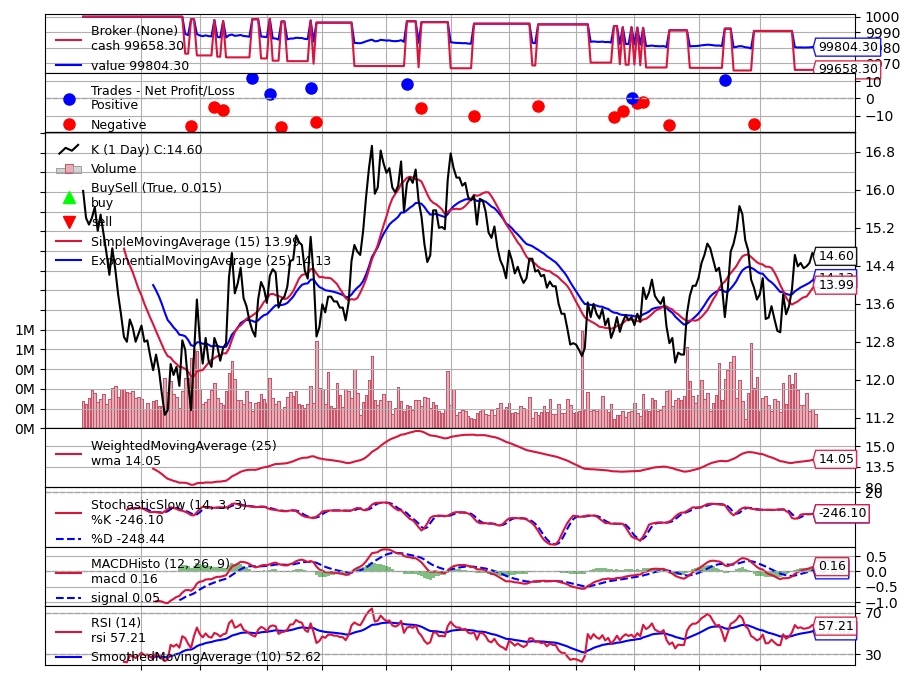

[[<Figure size 900x700 with 8 Axes>]]

In [16]:
cerebro.plot()